# Week 1: introduction to the Monte Carlo method

Monte Carlo methods are those numerical approaches to any problem in which __random numbers__ feature one way or another. Although the general idea is far from new, it came to fruition with the advent of computers in the 1940's and became increasingly capable with our ever increasing computing power. Nowadays it is employed all across the natural sciences, computing, [mathematics](https://encyclopediaofmath.org/wiki/Monte-Carlo_method), [engineering](https://en.wikipedia.org/wiki/Monte_Carlo_method#Engineering), [finance](https://en.wikipedia.org/wiki/Monte_Carlo_methods_in_finance), [computer graphics](https://en.wikipedia.org/wiki/Path_tracing), [artificial intelligence](https://en.wikipedia.org/wiki/Monte_Carlo_tree_search), [social sciences](https://us.sagepub.com/en-us/nam/monte-carlo-simulation-and-resampling-methods-for-social-science/book241131). Not to mention gambling, to which it owes its name...



Instead of jumping into the mathematics and probability theory underlying the technique or introducing the breadth of available Monte Carlo methods, we will start by looking at several very simple problems to get a feeling for what is ahead of us.

## Direct sampling: pebble game 1.0

The general problem of __sampling__, i.e. obtaining random samples from a desired distribution, is in general very difficult. In fact, a significant part of this course is geared towards developing increasingly powerful methods to attack such problems. To grasp the idea we start by looking at a very simple game, which we can imagine children playing in school yard. They draw an exact square and a circle inscribed it and from a distance they start throwing pebbles at it.  



Each pebble landing in the square constitutes a _trial_ and each pebble in the circle a _hit_.
We assume that the children are not too apt at throwing, meaning that most pebbles will actually miss the square (which are collected and thrown again), but when they do land in the square the resulting position is completely random and uniformly so.

By keeping track of the number of trials and hits, the children perform a __direct-sampling__ Monte Carlo computation of $\pi / 4$, because

$$ 
  \frac{\text{hits}}{\text{trials}} \approx \frac{\text{area of circle}}{\text{area of square}} = \frac{\pi}{4}. \tag{1}
$$ 

The reason this is called direct sampling is because the children have a purely operational way of producing trials independently with the desired distribution (the uniform distribution in the square). Let us write a python program to simulate the outcome of this game with $4000$ trials.

In [1]:
import numpy as np
# we make a habit of using NumPy's pseaudorandom number generator (we will get to this later!)
rng = np.random.default_rng()   

def random_in_square():
    """Returns a random position in the square [-1,1)x[-1,1)."""
    # random(n) generates an array with n floating point numbers in [0,1)
    return 2 * rng.random(2) - 1  

def is_in_circle(x):
    return np.dot(x,x) < 1

def simulate_number_of_hits(N):
    """Simulates number of hits in case of N trials in the pebble game."""
    number_hits = 0
    for i in range(N):
        position = random_in_square()
        if is_in_circle(position):
            number_hits += 1
    return number_hits

trials = 4000
hits = simulate_number_of_hits(trials)
print(hits , "hits, estimate of pi =", 4 * hits / trials )

3110 hits, estimate of pi = 3.11


This estimate is not too far off, but it is clear that the outcome still has some randomness to it. This is apparent when we look at the result of repeated experiment:

In [2]:
# build an array with the outcome of 10 repetitions
[simulate_number_of_hits(trials) for i in range(10)]

[3119, 3147, 3121, 3156, 3144, 3110, 3159, 3118, 3133, 3126]

Each of these outcomes gives an approximation of $\pi$ and we will see shortly how to compute the statistical errors expected from this Monte Carlo simulation. For now we interpret the outcomes in terms of the main principle of the direct-sampling Monte Carlo method and many of its variants. Let $p(\mathbf{x})\mathrm{d}\mathbf{x}$ be a __probability distribution__ on a continuous space $\Gamma$ parametrized by $\mathbf{x}\in\Gamma$, meaning that $p(\mathbf{x})$ is non-negative and $\int_\Gamma p(\mathbf{x})\mathrm{d}\mathbf{x} = 1$. Furthermore we let $\mathcal{O}(\mathbf{x})$ be an __observable__, i.e. a real or complex function on $\Gamma$. Then the __expectation value__ of $\mathcal{O}$ is given by
$$ \langle \mathcal{O} \rangle_{p} = \int\, \mathcal{O}(\mathbf{x})\, p(\mathbf{x}) \mathrm{d}\mathbf{x}. $$
Instead, we can look at a sampling $\mathbf{x}_1, \mathbf{x}_2, \ldots \in \Gamma$ of points that are each distributed according to $p$ and independent of each other. 
Central to Monte Carlo simulations is that we can approximate $\langle\mathcal{O}\rangle_p$ via
$$ \langle \mathcal{O} \rangle_{p} \approx \frac{1}{N} \sum_{i=1}^N \mathcal{O}(\mathbf{x}_i).$$
Of course the approximation gets better with increasing number $N$ of samples, how fast we will see in next week's lecture. Note that the probability distribution $p$ does not occur on the right-hand side anymore, so we have transfered the problem of integrating $\mathcal{O}$ against the probability distribution $p(\mathbf{x})\mathrm{d}\mathbf{x}$ to the problem of generating samples $\mathbf{x}_i$ and evaluating the observable on the samples.

How does our pebble game fit into this mathematical language? Here the sample space $\Gamma$ is the square $\Gamma = (-1,1)^2$ and the probability distribution is the uniform distribution $p(\mathbf{x}) = 1/4$, which indeed satisfies $\int_\Gamma p(\mathbf{x}) \mathrm{d}\mathbf{x} = \int_{-1}^1 \mathrm{d}x \int_{-1}^1 \mathrm{d}y \,\tfrac14 = 1$. What is the observable $\mathcal{O}$? We are interested in the ratio of hits to trials. If we denote the number of trials by $N$ then we can express this as 
$$\frac{\text{hits}}{\text{trials}} = \frac{1}{N} \sum_{\mathbf{x}_i} \mathcal{O}(\mathbf{x}_i),$$
where $\mathcal{O}(\mathbf{x}_i) = 1$ if $\mathbf{x}_i$ is inside the circle and it is equal to 0 otherwise. In other words $\mathcal{O}$ is the __indicator function__ $\mathbf{1}_{\{ x^2 + y^2 < 1 \}}$ on the set $\{ x^2 + y^2 < 1 \} \subset \Gamma$.
The expectation value of this observable is
$$\int_\Gamma \mathcal{O}(\mathbf{x}) p(\mathbf{x})\mathrm{d}\mathbf{x} = \int_{-1}^1 \mathrm{d}x\int_{-1}^1 \mathrm{d}y \,\tfrac14\, \mathbf{1}_{\{ x^2 + y^2 < 1 \}} = \frac{\pi}{4},$$
in agreement with the calculation (1) above.

## Markov-chain sampling: pebble game 2.0

The sampling problem in the pebble game is simple enough that we did not have to think twice how to design a direct sampling algorithm. For problems we will encounter later on this will be much more difficult and in many cases finding an efficient such algorithm is unfeasible. A more versatile technique is Markov chain sampling in which samples are not generated independently, as in the direct-sampling method, but via a __Markov chain__: samples are generated sequentially in a way that only depends on the previous sample (and not the full history of samples).

To introduce the principle we examine a variant of the pebble game to estimate the value of $\pi$. The goal is the same: the children wish to sample random positions in the square by throwing pebbles. This time however the square with inscribed circle is much larger (let's say the children moved to the local park), and extends beyond the range of a child's throw. To simplify matters we assume a single child is playing the game. The procedure of the game is altered as follows.
The child starts in some predetermined corner of the square with a bag full of pebbles. With closed eyes she throws the first pebble in a random direction and then she walks to where it has landed. From that position a new pebble is thrown and the procedure repeats. The goal is still to evenly sample from the square in order to estimate $\pi$. Now a problem arises when a pebble lands outside of the square. In the direct-sampling version, such an event was simply ignored and the pebble was just thrown again. In the new version of the game, however, a choice has to be made what to do with the out-of-range pebble and how to continue in such an event. Let us examine the consequences of different choices numerically.



We model the throw of a pebble by a random displacement within a disk of radius $\delta$. Based on the previous game we already know a way of sampling a uniform random point in a disk such, using direct sampling and rejection: 

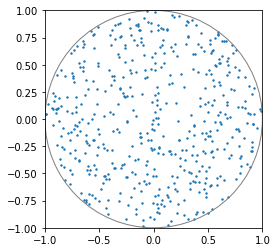

In [3]:
def random_in_disk():
    """Returns a uniform point in the unit disk via rejection."""
    position = random_in_square()
    while not is_in_circle(position):
        position = random_in_square()
    return position

# let us test this visually
import matplotlib.pylab as plt
# tell jupyter to display graphics inline
%matplotlib inline

# sample 500 points in NumPy array
testpoints = np.array([random_in_disk() for i in range(500)])
# make a plot
fig, ax = plt.subplots()  
ax.set_xlim(-1,1)    # set axis limits
ax.set_ylim(-1,1)
ax.set_aspect('equal')    # preserve aspect ratio of the circle
ax.add_patch(plt.Circle((0,0),1.0,edgecolor='gray',facecolor='none'))
plt.scatter(testpoints[:,0],testpoints[:,1],s=2)
plt.show()

In our first version of this game the child discards any pebbles that end up outside of the square and stays in place before throwing the next. We can simulate this as follows.

In [4]:
def is_in_square(x):
    """Returns True if x is in the square (-1,1)^2."""
    return np.abs(x[0]) < 1 and np.abs(x[1]) < 1
    
def naive_markov_pebble(start,delta,N):
    """Simulates the number of hits in the naive Markov-chain version of the pebble game."""
    number_hits = 0
    position = start
    for i in range(N):
        next_position = position + delta*random_in_disk()
        while not is_in_square(next_position):
            next_position = position + delta*random_in_disk()
        position = next_position
        
        if is_in_circle(position):
            number_hits += 1
    return number_hits

trials = 20000
delta = 0.3
start = [1,1]  # top-right corner
hits = naive_markov_pebble(start,delta,trials)
print(hits , "hits out of", trials, ", naive estimate of pi =", 4 * hits / trials )

16663 hits out of 20000 , naive estimate of pi = 3.3326


This estimate does not look particularly good, reporting an estimate of $\pi$ that is above target. Whether the deviation is significant or not, we can only decide after discussing the statistical errors. But comparing to the direct-sampling estimates we should be getting suspicious. This suspicion is confirmed when we look at a histogram of trials in the square:

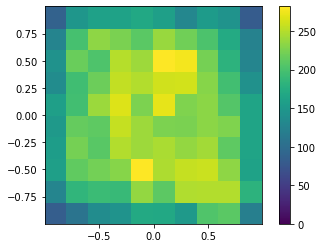

In [5]:
def naive_markov_pebble_trials(start,delta,N):
    points = []
    position = start
    for i in range(N):
        next_position = position + delta*random_in_disk()
        while not is_in_square(next_position):
            next_position = position + delta*random_in_disk()
        position = next_position
        
        # only difference with previous function is that we now store the points
        points.append(position)
    return points

# collect an array of points
trials = 20000
delta = 0.4
start = [1,1]
testpoints = np.array(naive_markov_pebble_trials(start,delta,trials))

# make a plot
fig, ax = plt.subplots() 
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_aspect('equal') # preserve aspect ratio of the square
plt.hist2d(testpoints[:,0],testpoints[:,1], bins=10, vmin=0)
plt.colorbar()
plt.show()

We clearly observe that the density of points near the boundary is lower compared to the central region. This means that the algorithm is not sampling properly from the uniform distribution on the square, but from some more complicated distribution. Can you think of a reason why this is the case?

A different choice in the case of an out-of-range throw is not to discard the pebble, but to have it retrieved and deposited at the location from where it was thrown before continuing to throw the next pebble. We call this a __rejection__. Note that there was already a pebble at that location from the previous throw, so for every rejection the pile of pebbles at the current location is increased with one. After the desired number of trials (i.e. pebbles deposited in the square), the number of hits within the circle can be counted. Note that the distribution of pebbles will be quite different compared to the direct sampling before: close to the boundary (more precisely, within distance $\delta$) many of the pebbles will be part of piles, while in the central region no piles are to be found. Indeed, the chance that pebbles end up at the exact same position there is zero, just like in the direct sampling.



Let us simulate this process.

In [6]:
def markov_pebble(start,delta,N):
    """Simulates the number of hits in the proper Markov-chain version of the pebble game."""
    number_hits = 0
    position = start
    for i in range(N):
        next_position = position + delta*random_in_disk()
        if is_in_square(next_position):
            # we accept the move
            position = next_position
        
        if is_in_circle(position):
            number_hits += 1
    return number_hits

trials = 20000
delta = 0.3
start = [1,1]
hits = markov_pebble(start,delta,trials)
print(hits , "hits out of", trials, ", estimate of pi =", 4 * hits / trials )

15914 hits out of 20000 , estimate of pi = 3.1828


Judging by this single estimate we are already much closer to the exact value $\pi = 3.1415\ldots$, and we might be inclined to trust this algorithm. Let us also have a look at the histogram:

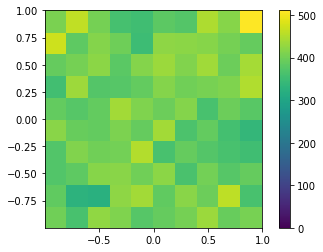

In [7]:
def markov_pebble_trials(start,delta,N):
    """Returns all the trials in the Markov-chain sampling of the pebble game."""
    points = []
    position = start
    for i in range(N):
        next_position = position + delta*random_in_disk()
        if is_in_square(next_position):
            position = next_position
        points.append(position)
    return points

# collect an array of points
trials = 40000
delta = 0.4
start = [1,1]
testpoints = np.array(markov_pebble_trials(start,delta,trials))

# make a plot
fig, ax = plt.subplots() 
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_aspect('equal') # preserve aspect ratio of the square
plt.hist2d(testpoints[:,0],testpoints[:,1], bins=10, vmin=0)
plt.colorbar()
plt.show()

Although the distribution over the square is not exactly uniform we do not observe a clear preference for the boundary versus center region anymore. Indeed we will convince ourselves later that with very many trials the distribution of pebbles approaches the uniform distribution, implying that the ratio of hits to trials approaches $\pi/4$. Note that the density of piles is identical to the previous algorithm, but apparently having multiple pebbles per pile in the boundary region exactly balances the reduced density of piles! 

The method we see in action is a simple example of what is called the __Metropolis algorithm__ for Markov-chain sampling: at each step of the Markov chain a random move is proposed and then accepted or rejected based on the outcome, and in case of a rejection you stay in place and wait. It should be clear that such a method is less efficient than direct sampling, because it can take many steps for the Markov chain to explore the full domain. This is particularly clear if we take the throwing range to $\delta$ to be very small. In this case it takes many throws even to leave the starting corner of the square. At the other extreme, if we take $\delta \gg 1$ almost all throws will result in rejections, leading to relatively few piles with many pebbles. Although in both cases we can prove convergence to the correct distribution, the rate of convergence depends on $\delta$. A good rule of thumb is to choose the parameters in your Metropolis algorithm, in this case $\delta$, such that the rejection rate is of order $1/2$, meaning that half of the proposed moves are rejected. 

## Markov-chain sampling: a discrete pebble game

To get a feeling for why the Metropolis algorithm with its rejection strategy works, let us simplify the problem even further. Instead of pebbles landing in a continuous set of locations in the unit square, let us make the domain discrete and only allow the pebbles to end up in a row of $m$ sites. Accordingly we only allow Markov-chain moves to nearest-neighbor sites and rejections. The goal is to choose the move probabilities such that the distribution after many moves approaches the uniform distribution $p(i) = 1/m$ for $i = 1,\ldots,m$.   



If the player is in position $i$ we denote the probability of a move to $j \in \{i-1,i,i+1\}$ by $P(i \to j)$. It should be clear that the number of times it jumps $i \to i+1$ is the same as $i+1 \to i$ (ok, they can differ by $1$). So after many moves these two events will happen with equal probability. For $i\to i-1$ to occur the player has to be in position $i$, which happens with probability $p(i)$, and select the move $i\to i+1$, with probability $P( i \to i+1)$. We thus obtain an equation relating the equilibrium distribution $p$ to the move probabilities,

$$ p(i) P(i \to i+1) = p(i+1) P( i+1 \to i). \tag{2}$$

For this to be satisfied for the uniform distribution $p(i) = 1/m$, we must have $P(i \to i+1) = P(i+1 \to i)$. In particular this implies we cannot choose $P( 1 \to 2) = 1$, because then also $P( 2 \to 1 ) = 1$ and the player would just oscillate back and forth between the first two sites. Although (2) does not have a unique solution, a simple solution clearly is to take all $P(i \to i\pm 1) = \tfrac12$. Since a player at site $1$ cannot move to $0$, we must therefore allow for a rejection, i.e. $P(1 \to 1) = \tfrac12$, and similarly for site $m$. Let us verify the validity of this analysis with a simulation.

[16221 16593 16915 16962 16874 16435]


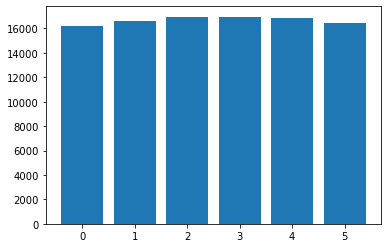

In [8]:
def simulate_discrete_pebble(m,N):
    """Simulate discrete pebble game of N moves on m sites, returning a histogram of pebbles per site."""
    histogram = np.zeros(m, dtype=int)
    position = 0
    for i in range(N):
        position += np.random.choice([-1,1])
        position = max(position, 0)
        position = min(position, m-1)
        histogram[position] += 1
    return histogram

histogram = simulate_discrete_pebble(6,100000)
print(histogram)
plt.bar(range(6),histogram)
plt.show()

Equation (2) is called __detailed balance__. In this simple example it is a necessary condition to reach the equilibrium distribution $p$. In general Markov chains this is not the case, but we will see that imposing detailed balance is a convenient way to design simulations that have the desired equilibrium condition.

### References

For further reading on this week's material, have a look at Section 1.1 of

Krauth, Werner. [Statistical mechanics: algorithms and computations.](https://global.oup.com/ukhe/product/statistical-mechanics-algorithms-and-computations-9780198515364?cc=nl&lang=en&) Vol. 13. OUP Oxford, 2006.
